In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.8
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.8_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.8_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	616.4031

Best Fitness:	613.2685
Solution:	600.0000
Diff:		13.2685

[0:33:56][----------] 1.96% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	609.7179

Best Fitness:	608.1012
Solution:	600.0000
Diff:		8.1012

[1:04:48][----------] 3.92% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	611.4956

Best Fitness:	608.7379
Solution:	600.0000
Diff:		8.7379

[1:35:33][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	612.5174

Best Fitness:	610.2131
Solution:	600.0000
Diff:		10.2131

[2:06:22][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	614.4753

Best Fitness:	611.7518
Solution:	600.0000
Diff:		11.7518

[2:37:18][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	606.9827

Best Fitness:	605.3053
Solution:	600.0000
Diff:		5.3053

[3:05:25][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	613.0921

Best Fitness:	610.9356
Solution:	600.0000
Diff:		10.9356

[3:32:59][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	612.1322

Best Fitness:	610.1351
Solution:	600.0000
Diff:		10.1351

[4:00:13][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	609.2187

Best Fitness:	606.7829
Solution:	600.0000
Diff:		6.7829

[4:27:01][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	618.1194

Best Fitness:	614.5102
Solution:	600.0000
Diff:		14.5102

[4:53:58][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	604.9537

Best Fitness:	603.8376
Solution:	600.0000
Diff:		3.8376

[5:20:59][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	606.0876

Best Fitness:	604.9053
Solution:	600.0000
Diff:		4.9053

[5:47:01][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	604.9930

Best Fitness:	603.8639
Solution:	600.0000
Diff:		3.8639

[6:11:25][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	607.6392

Best Fitness:	606.1143
Solution:	600.0000
Diff:		6.1143

[6:35:45][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	608.6659

Best Fitness:	607.0501
Solution:	600.0000
Diff:		7.0501

[7:00:08][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	612.5660

Best Fitness:	610.1655
Solution:	600.0000
Diff:		10.1655

[7:23:57][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	608.7104

Best Fitness:	606.7878
Solution:	600.0000
Diff:		6.7878

[7:47:50][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	618.1657

Best Fitness:	612.1784
Solution:	600.0000
Diff:		12.1784

[8:10:58][####------] 35.29% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	609.0336

Best Fitness:	607.3867
Solution:	600.0000
Diff:		7.3867

[8:33:06][####------] 37.25% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	611.9066

Best Fitness:	609.2836
Solution:	600.0000
Diff:		9.2836

[8:54:10][####------] 39.22% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	608.8852

Best Fitness:	606.8257
Solution:	600.0000
Diff:		6.8257

[9:14:59][####------] 41.18% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	611.3784

Best Fitness:	609.7463
Solution:	600.0000
Diff:		9.7463

[9:36:20][####------] 43.14% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	609.7178

Best Fitness:	608.2667
Solution:	600.0000
Diff:		8.2667

[9:58:04][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	608.3662

Best Fitness:	606.2837
Solution:	600.0000
Diff:		6.2837

[10:18:46][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	608.7813

Best Fitness:	607.1029
Solution:	600.0000
Diff:		7.1029

[10:39:53][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	613.8607

Best Fitness:	611.4312
Solution:	600.0000
Diff:		11.4312

[11:00:03][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	616.2838

Best Fitness:	612.3612
Solution:	600.0000
Diff:		12.3612

[11:19:34][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	621.0691

Best Fitness:	617.5029
Solution:	600.0000
Diff:		17.5029

[11:38:36][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	613.1619

Best Fitness:	609.9381
Solution:	600.0000
Diff:		9.9381

[11:56:53][######----] 56.86% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	606.9958

Best Fitness:	605.5363
Solution:	600.0000
Diff:		5.5363

[12:14:58][######----] 58.82% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	610.2667

Best Fitness:	607.4052
Solution:	600.0000
Diff:		7.4052

[12:33:04][######----] 60.78% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	611.1354

Best Fitness:	609.0429
Solution:	600.0000
Diff:		9.0429

[12:48:49][######----] 62.75% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	608.7626

Best Fitness:	607.1418
Solution:	600.0000
Diff:		7.1418

[13:04:33][######----] 64.71% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	605.0949

Best Fitness:	603.9419
Solution:	600.0000
Diff:		3.9419

[13:20:01][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	618.2650

Best Fitness:	614.9465
Solution:	600.0000
Diff:		14.9465

[13:34:50][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	608.3004

Best Fitness:	606.4085
Solution:	600.0000
Diff:		6.4085

[13:49:18][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	609.6397

Best Fitness:	607.6673
Solution:	600.0000
Diff:		7.6673

[14:02:53][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	612.5613

Best Fitness:	609.5169
Solution:	600.0000
Diff:		9.5169

[14:15:32][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	604.5754

Best Fitness:	603.5958
Solution:	600.0000
Diff:		3.5958

[14:27:31][########--] 76.47% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	611.9038

Best Fitness:	609.5857
Solution:	600.0000
Diff:		9.5857

[14:39:19][########--] 78.43% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	605.8174

Best Fitness:	604.5945
Solution:	600.0000
Diff:		4.5945

[14:51:13][########--] 80.39% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	605.2061

Best Fitness:	604.2068
Solution:	600.0000
Diff:		4.2068

[15:03:05][########--] 82.35% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	611.4080

Best Fitness:	609.3414
Solution:	600.0000
Diff:		9.3414

[15:13:52][########--] 84.31% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	608.7320

Best Fitness:	607.1646
Solution:	600.0000
Diff:		7.1646

[15:24:10][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	609.7828

Best Fitness:	607.8806
Solution:	600.0000
Diff:		7.8806

[15:33:21][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	610.8331

Best Fitness:	608.3839
Solution:	600.0000
Diff:		8.3839

[15:42:50][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	616.7458

Best Fitness:	613.9563
Solution:	600.0000
Diff:		13.9563

[15:52:52][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	611.1486

Best Fitness:	608.6865
Solution:	600.0000
Diff:		8.6865

[16:01:42][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	615.3114

Best Fitness:	612.3020
Solution:	600.0000
Diff:		12.3020

[16:09:55][##########] 96.08% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	605.3573

Best Fitness:	603.9812
Solution:	600.0000
Diff:		3.9812

[16:18:08][##########] 98.04% 

Optimization ended due to max fitness evals (max = 240000.0, curr = 239400)


#Generations:	796

#FitnessEvals:	239400

Mean Fitness:	610.9700

Best Fitness:	609.1470
Solution:	600.0000
Diff:		9.1470

[16:26:41][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

16:26:41

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
791,10.971910,11.019498,10.997289,10.752282,10.128071,11.23548,10.45561,10.429716,10.855293,10.599347,...,10.748659,10.855184,11.405051,11.722355,11.444716,10.873352,11.683542,10.841427,11.447682,50
792,10.971910,11.019498,10.997289,10.752282,10.128071,11.23548,10.45561,10.429716,10.855293,10.599347,...,10.748659,10.855184,11.405051,11.722355,11.444716,10.873352,11.683542,10.841427,11.447682,50
793,10.462634,11.019498,10.997289,10.752282,10.128071,11.23548,10.45561,10.429716,10.855293,10.599347,...,10.748659,10.855184,11.405051,11.722355,11.444716,10.873352,11.683542,10.841427,11.447682,50
794,10.462634,11.019498,10.997289,10.752282,10.128071,11.23548,10.45561,10.429716,10.855293,10.599347,...,10.748659,10.855184,11.405051,11.722355,11.444716,10.873352,11.683542,10.841427,11.447682,50
795,10.462634,11.019498,10.997289,10.752282,10.128071,11.23548,10.45561,10.429716,10.855293,10.599347,...,10.748659,10.855184,11.405051,11.722355,11.444716,10.873352,11.683542,10.841427,11.447682,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 13.268493699359055

Best error for run 1: 8.101151728465425

Best error for run 2: 8.737947648801537

Best error for run 3: 10.213125564903521

Best error for run 4: 11.751784789119142

Best error for run 5: 5.305327421189077

Best error for run 6: 10.93559917092

Best error for run 7: 10.135074866752802

Best error for run 8: 6.782862293860035

Best error for run 9: 14.510179783571061

Best error for run 10: 3.837631546321745

Best error for run 11: 4.9052980654078056

Best error for run 12: 3.8638550283998256

Best error for run 13: 6.114262588750989

Best error for run 14: 7.050100024392009

Best error for run 15: 10.16549446760962

Best error for run 16: 6.787806862703064

Best error for run 17: 12.17839459602078

Best error for run 18: 7.386744927721111

Best error for run 19: 9.283579158959583

Best error for run 20: 6.825663500274004

Best error for run 21: 9.74632256471989

Best error for run 22: 8.266714378191068

Best error for run 23: 6.283657726288652

Best error for run 24: 7.10290251116453

Best error for run 25: 11.431227864691778

Best error for run 26: 12.361191730314658

Best error for run 27: 17.502910822512035

Best error for run 28: 9.938079109844352

Best error for run 29: 5.536349046720147

Best error for run 30: 7.405214580741244

Best error for run 31: 9.042935041027476

Best error for run 32: 7.141773694433482

Best error for run 33: 3.941873803723638

Best error for run 34: 14.946512152590685

Best error for run 35: 6.408485672110942

Best error for run 36: 7.667327154181066

Best error for run 37: 9.516900571943665

Best error for run 38: 3.5958184768484216

Best error for run 39: 9.585682656431345

Best error for run 40: 4.594527489011853

Best error for run 41: 4.206757999100546

Best error for run 42: 9.341384034705015

Best error for run 43: 7.164573825829962

Best error for run 44: 7.8805535207168305

Best error for run 45: 8.38387495379095

Best error for run 46: 13.95629485013012

Best error for run 47: 8.68646290444724

Best error for run 48: 12.301961141316951

Best error for run 49: 3.9812068303468777

Best error for run 50: 9.14698150241577

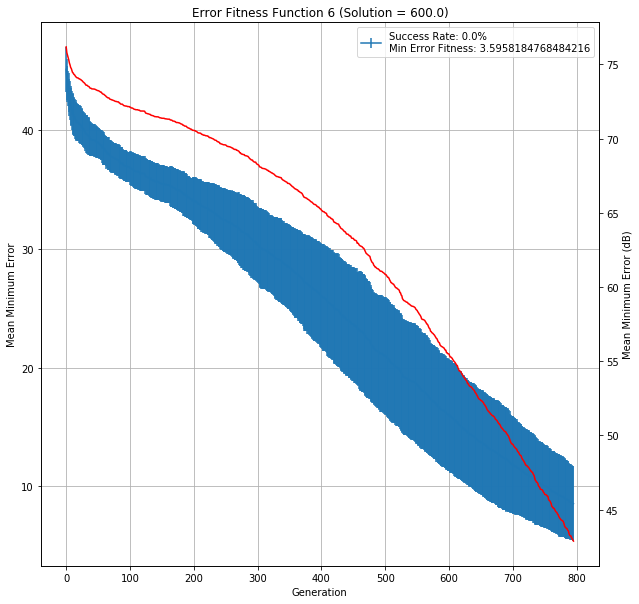

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.8_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.8,13.268494,8.101152,8.737948,10.213126,11.751785,5.305327,...,7.880554,8.383875,13.956295,8.686463,12.301961,3.981207,9.146982,8.533467,16:26:41,239400
